In [ ]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import pandas as pd


In [ ]:
x = np.array([110, 200, 500, 100])
y = np.array([50, 150, 30, 70])

x_shape = np.max(x)
y_shape = np.max(y)
image = np.zeros((x_shape + 10, y_shape + 10))
image[x, y] = 10

plt.figure(figsize=(20, 20))
plt.imshow(image.transpose(), interpolation='nearest', aspect='equal')

5222


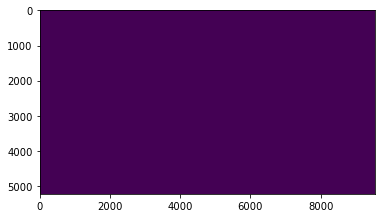

In [20]:

df = pd.read_csv('scanData.txt',delimiter=',')

distance = df.values[:,1]
angle= df.values[:,0]


cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]
#print(cartesian.shape)
x, y = map(list, zip(*cartesian))
a= np.array(x)
b= np.array(y)

#create an image from list of points
a += np.min(a)*-1
b += np.min(b)*-1
a = np.floor(a).astype(int)
b= np.floor(b).astype(int)

#print(a,b)
x_shape = np.max(a)
y_shape = np.max(b)

print(x_shape)
im = np.zeros((x_shape+1, y_shape+1))
im.shape
indices = np.stack([a-1,b-1], axis =1).astype(int)
#print(indices)
im[indices[:,0], indices[:,1]] = 255

plt.imshow(im)

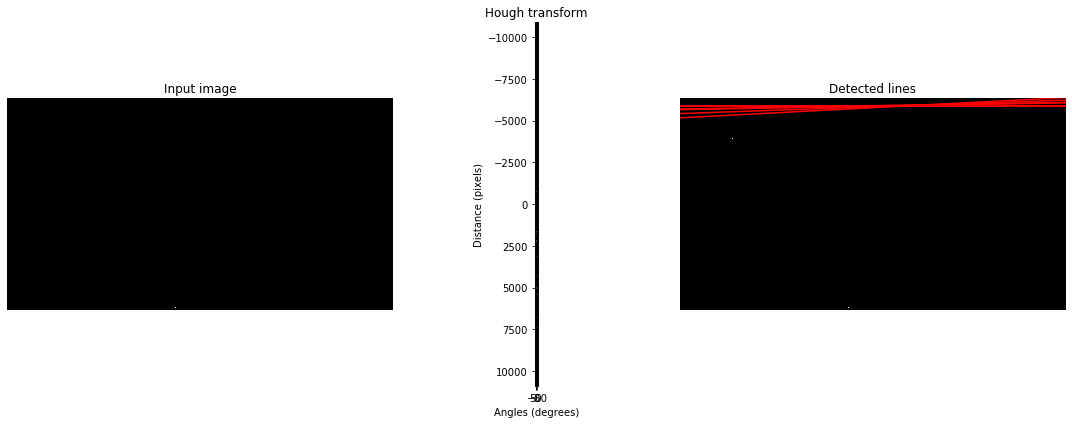

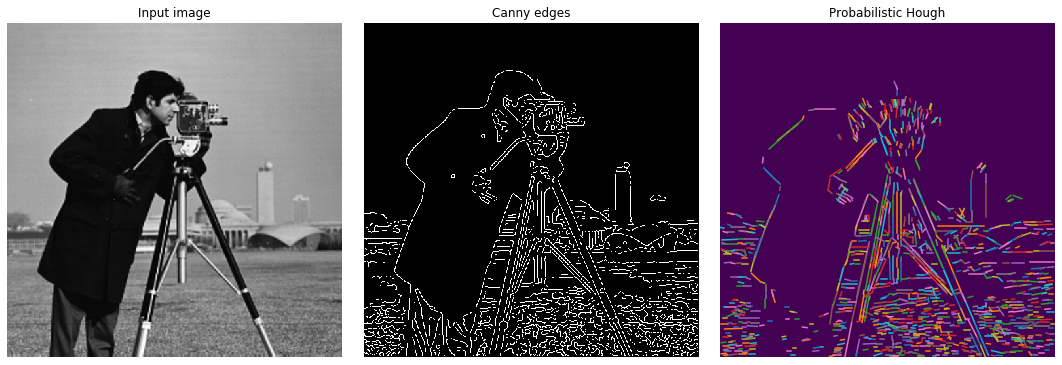

In [8]:

# Constructing test image
#image = np.zeros((100, 100))
#idx = np.arange(25, 75)
#image[idx[::-1], idx] = 255
#image[idx, idx] = 255

image = im

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()



